In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import pathlib
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [2]:

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-03-18 15:08:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  19.1MB/s    in 6.7s    

2023-03-18 15:08:22 (15.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref = zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
for dirpath, dirnames, filenames in os.walk("/content/pizza_steak"):
  print(dirpath, dirnames, len(filenames))

/content/pizza_steak ['train', 'test'] 0
/content/pizza_steak/train ['steak', 'pizza'] 0
/content/pizza_steak/train/steak [] 750
/content/pizza_steak/train/pizza [] 750
/content/pizza_steak/test ['steak', 'pizza'] 0
/content/pizza_steak/test/steak [] 250
/content/pizza_steak/test/pizza [] 250


In [6]:
num_steak_train_images = len(os.listdir("/content/pizza_steak/train/steak"))
num_steak_train_images

750

In [7]:
data_dir = pathlib.Path("/content/pizza_steak/train")
class_names = []
for item in data_dir.glob("*"):
  class_names.append(item.name)
class_names, os.listdir("/content/pizza_steak/train")


(['steak', 'pizza'], ['steak', 'pizza'])

In [8]:
class_names = np.array(sorted(class_names))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  images = os.listdir(target_folder)
  # print(images)
  random_image = random.sample(images, 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  print(img.shape)
  return img

['1761285.jpg']
(384, 512, 3)


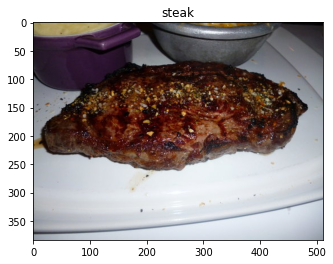

In [10]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [11]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[152, 140,  92],
        [152, 140,  92],
        [152, 140,  90],
        ...,
        [  1,   0,   6],
        [  1,   0,   6],
        [  1,   0,   6]],

       [[152, 140,  92],
        [153, 141,  93],
        [154, 142,  94],
        ...,
        [  2,   0,   5],
        [  2,   0,   6],
        [  2,   0,   6]],

       [[151, 140,  94],
        [153, 142,  96],
        [156, 144,  96],
        ...,
        [  3,   1,   6],
        [  3,   1,   6],
        [  3,   1,   6]],

       ...,

       [[145, 151, 163],
        [146, 152, 164],
        [146, 152, 164],
        ...,
        [146, 154, 167],
        [145, 153, 166],
        [145, 153, 166]],

       [[144, 150, 162],
        [145, 151, 163],
        [145, 151, 163],
        ...,
        [145, 153, 166],
        [144, 152, 165],
        [143, 151, 164]],

       [[146, 150, 162],
        [146, 150, 162],
        [147, 151, 163],
        ...,
        [144, 152, 16

In [12]:
img/255.

array([[[0.59607843, 0.54901961, 0.36078431],
        [0.59607843, 0.54901961, 0.36078431],
        [0.59607843, 0.54901961, 0.35294118],
        ...,
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941]],

       [[0.59607843, 0.54901961, 0.36078431],
        [0.6       , 0.55294118, 0.36470588],
        [0.60392157, 0.55686275, 0.36862745],
        ...,
        [0.00784314, 0.        , 0.01960784],
        [0.00784314, 0.        , 0.02352941],
        [0.00784314, 0.        , 0.02352941]],

       [[0.59215686, 0.54901961, 0.36862745],
        [0.6       , 0.55686275, 0.37647059],
        [0.61176471, 0.56470588, 0.37647059],
        ...,
        [0.01176471, 0.00392157, 0.02352941],
        [0.01176471, 0.00392157, 0.02352941],
        [0.01176471, 0.00392157, 0.02352941]],

       ...,

       [[0.56862745, 0.59215686, 0.63921569],
        [0.57254902, 0.59607843, 0.64313725],
        [0.57254902, 0

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_dir = "pizza_steak/train/"
val_dir = "pizza_steak/test/"

In [15]:
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               seed = 42,
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.


In [16]:
val_data = val_datagen.flow_from_directory(val_dir, 
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               seed = 42,
                                               class_mode="binary")

Found 500 images belonging to 2 classes.


In [17]:
tf.random.set_seed=42
cnn_model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(224, 224, 3), filters = 10, kernel_size=3, activation="relu" ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [18]:
cnn_model1.compile(loss = tf.keras.losses.binary_crossentropy,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

In [19]:
history = cnn_model1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 39s 464ms/step - loss: 0.5830 - accuracy: 0.6933 - val_loss: 0.4567 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4641 - accuracy: 0.7833 - val_loss: 0.4165 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4438 - accuracy: 0.7993 - val_loss: 0.4535 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 15s 313ms/step - loss: 0.4084 - accuracy: 0.8260 - val_loss: 0.3425 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 14s 287ms/step - loss: 0.3682 - accuracy: 0.8467 - val_loss: 0.3472 - val_accuracy: 0.8500


In [20]:
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [21]:
tf.random.set_seed = 42

mlp_model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
mlp_model1.compile(loss = tf.keras.losses.binary_crossentropy,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

history2 = mlp_model1.fit(train_data, epochs = 3, steps_per_epoch=len(train_data), validation_data = val_data, validation_steps = len(val_data))

Epoch 1/3
47/47 [==============================] - 13s 229ms/step - loss: 2.9818 - accuracy: 0.5187 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/3
47/47 [==============================] - 10s 215ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/3
47/47 [==============================] - 12s 254ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [22]:
tf.random.set_seed = 42

mlp_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

mlp_model2.compile(loss = tf.keras.losses.binary_crossentropy,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

history3 = mlp_model2.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps = len(val_data))

Epoch 1/5
47/47 [==============================] - 16s 306ms/step - loss: 3.0714 - accuracy: 0.6707 - val_loss: 0.5060 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 14s 292ms/step - loss: 0.9322 - accuracy: 0.6967 - val_loss: 0.9413 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.8346 - accuracy: 0.7313 - val_loss: 0.7417 - val_accuracy: 0.7260
Epoch 4/5
47/47 [==============================] - 12s 250ms/step - loss: 0.6698 - accuracy: 0.7740 - val_loss: 0.6464 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 12s 253ms/step - loss: 0.5032 - accuracy: 0.8113 - val_loss: 0.7078 - val_accuracy: 0.7280


In [23]:
mlp_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 10)                1505290   
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,505,411
Trainable params: 1,505,411
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.layers.serialization import activation
cnn_model2 = Sequential([
  
    Conv2D(10, 3, strides = 1, activation="relu", padding="valid", input_shape = (224,224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [25]:
cnn_model2.compile(loss = binary_crossentropy,
                   optimizer = Adam(),
                   metrics = ["accuracy"])

In [26]:
history4 = cnn_model2.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 15s 269ms/step - loss: 1.2032 - accuracy: 0.6820 - val_loss: 0.4950 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 0.4729 - accuracy: 0.7780 - val_loss: 0.4458 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3789 - accuracy: 0.8420 - val_loss: 0.3818 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.2649 - accuracy: 0.9027 - val_loss: 0.4562 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.1261 - accuracy: 0.9700 - val_loss: 0.4692 - val_accuracy: 0.8060


In [27]:
cnn_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [28]:
cnn_model2.evaluate(val_data)

16/16 [==============================] - 3s 187ms/step - loss: 0.4692 - accuracy: 0.8060


[0.46917644143104553, 0.8059999942779541]

<Axes: >

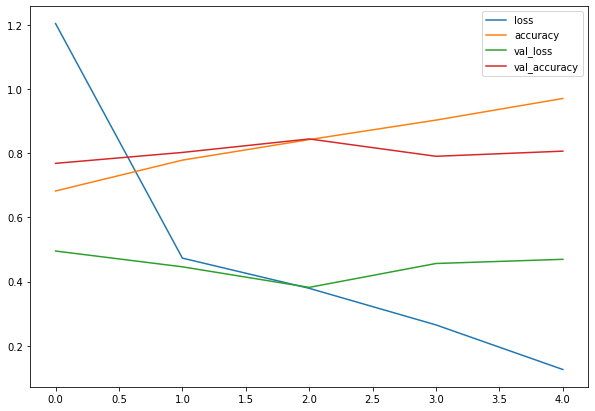

In [29]:
pd.DataFrame(history4.history).plot(figsize=(10, 7))

In [30]:
def plot_history(history):
  history = history.history
  val_loss = history["val_loss"]
  train_loss = history["loss"]
  
  train_accuracy = history["accuracy"]
  val_accuracy = history["val_accuracy"]

  epochs = range(len(val_loss))

  plt.figure()
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.plot(epochs, train_accuracy, label="training_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, val_loss, label="val_loss")
  plt.plot(epochs, train_loss, label="loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

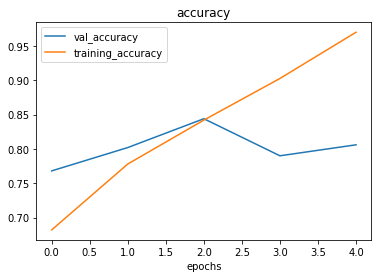

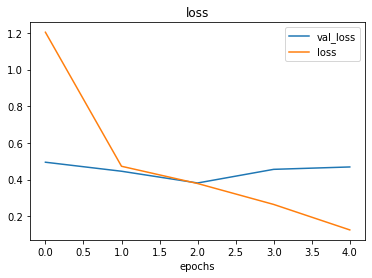

In [31]:
plot_history(history4)

In [34]:
cnn_model3 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

cnn_model3.compile(loss = binary_crossentropy,
                   optimizer = Adam(),
                   metrics = ["accuracy"])

In [35]:
history5 = cnn_model3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = val_data, validation_steps = len(val_data))

Epoch 1/5
47/47 [==============================] - 14s 274ms/step - loss: 0.6642 - accuracy: 0.6347 - val_loss: 0.5294 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 13s 277ms/step - loss: 0.5253 - accuracy: 0.7553 - val_loss: 0.4234 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 17s 365ms/step - loss: 0.4497 - accuracy: 0.7953 - val_loss: 0.4779 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 14s 295ms/step - loss: 0.4107 - accuracy: 0.8113 - val_loss: 0.3512 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3959 - accuracy: 0.8227 - val_loss: 0.3331 - val_accuracy: 0.8820


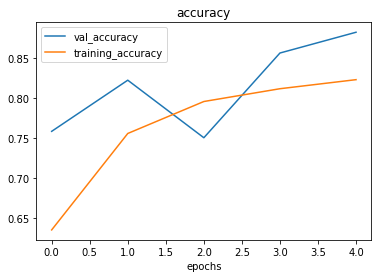

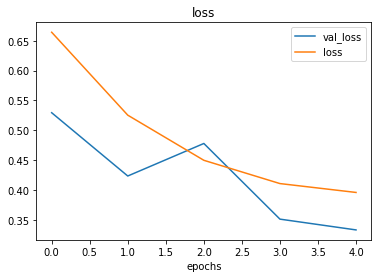

In [36]:
plot_history(history5)

<Axes: >

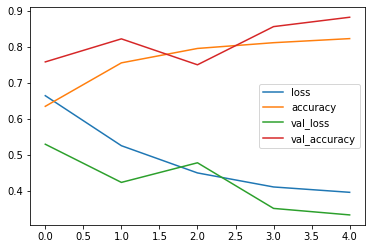

In [37]:
pd.DataFrame(history5.history).plot(figsize=(10,7))

In [39]:
cnn_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [42]:
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2,
                                             horizontal_flip = True)


In [43]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size = 32,
                                                                   class_mode="binary",
                                                                   target_size=(224,224),
                                                                   seed = 42)


Found 1500 images belonging to 2 classes.


In [44]:
cnn_model4 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

cnn_model4.compile(loss = binary_crossentropy,
                   optimizer= Adam(),
                   metrics=["accuracy"])

In [45]:
history6 = cnn_model4.fit(train_data_augmented, epochs = 5, steps_per_epoch=len(train_data_augmented), validation_data=val_data, validation_steps=len(val_data))

Epoch 1/5
47/47 [==============================] - 25s 502ms/step - loss: 0.6712 - accuracy: 0.5687 - val_loss: 0.6418 - val_accuracy: 0.5800
Epoch 2/5
47/47 [==============================] - 28s 609ms/step - loss: 0.5657 - accuracy: 0.7113 - val_loss: 0.5529 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 31s 673ms/step - loss: 0.5414 - accuracy: 0.7360 - val_loss: 0.4128 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 29s 624ms/step - loss: 0.4923 - accuracy: 0.7647 - val_loss: 0.4417 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 24s 502ms/step - loss: 0.4870 - accuracy: 0.7773 - val_loss: 0.3634 - val_accuracy: 0.8360


In [48]:
cnn_model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

<Axes: >

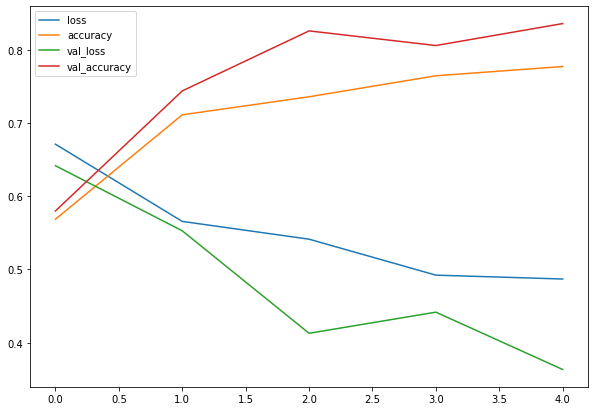

In [54]:
pd.DataFrame(history6.history).plot(figsize=(10, 7))